<a href="https://colab.research.google.com/github/CseMony/Hello-world/blob/master/face_98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage import io
import pandas as pd
import os
from skimage.color import rgb2gray
from skimage import data, color, exposure
from PIL import Image

dataset_path = '/gdrive/My Drive/gt_db'

dataset_dir  = os.listdir(dataset_path)
count=0 
training_data=[]
img_size=165
train_path='/gdrive/My Drive/cropped_faces'
#class_num=13233
def create_training_data():
  
                    
  for i in os.listdir(dataset_path):
      path=['/gdrive/My Drive/gt_db/'+i]
      #print(path)
      for j in path: 
        #print(i)
          directory  = os.listdir(j)
          for k in directory:
            filename=j+'/'+k
            if k.endswith(".jpg"):
              img = io.imread(filename)
              #print(filename)
              cls = filename.split("/")[4]
              class_num=cls[1]+cls[2]
              class_num=int(class_num)
              class_num=class_num-1
              #print(class_num)
              
              new_array=cv2.resize(img,(img_size,img_size),3)
              training_data.append([new_array,class_num])
            
create_training_data()     


In [42]:
X=[]
y=[]
for feature,label in training_data:
  X.append(feature)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3) 
y = np.array(y).reshape(-1, 1) 


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,stratify=y,random_state=42)

In [44]:
from tensorflow.keras import backend
from tensorflow import keras
from keras import regularizers
from keras.regularizers import l2,l1
#Instantiate an empty model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model=tf.keras.models.Sequential()

# C1 Convolutional Layer
#64 add
model.add(keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu',input_shape=(img_size,img_size,3), padding='same'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
#model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))        

In [45]:

model.add(keras.layers.Flatten())

In [46]:

model.add(keras.layers.Dense(1150, activation='relu'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(400, activation='relu'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(50, activation='softmax'))

# Compile the model


#model.compile(loss=tf.losses.sigmoid_cross_entropy, optimizer='sgd', metrics=['accuracy'])
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.0001,decay=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 165, 165, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 165, 165, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 82, 82, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 82, 82, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 41, 41, 128)       7

In [47]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

hist=model.fit(X_train, y_train,
          batch_size=132,
          epochs=23,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])

Epoch 1/23
5/5 [==============================] - ETA: 0s - loss: 24.7684 - accuracy: 0.0233 
Epoch 00001: loss improved from inf to 24.76840, saving model to best_model.hdf5
5/5 [==============================] - 78s 16s/step - loss: 24.7684 - accuracy: 0.0233 - val_loss: 7.7166 - val_accuracy: 0.1000
Epoch 2/23
5/5 [==============================] - ETA: 0s - loss: 9.7677 - accuracy: 0.0600  
Epoch 00002: loss improved from 24.76840 to 9.76768, saving model to best_model.hdf5
5/5 [==============================] - 78s 16s/step - loss: 9.7677 - accuracy: 0.0600 - val_loss: 2.8760 - val_accuracy: 0.2267
Epoch 3/23
5/5 [==============================] - ETA: 0s - loss: 4.1973 - accuracy: 0.1233 
Epoch 00003: loss improved from 9.76768 to 4.19733, saving model to best_model.hdf5
5/5 [==============================] - 80s 16s/step - loss: 4.1973 - accuracy: 0.1233 - val_loss: 2.3510 - val_accuracy: 0.5200
Epoch 4/23
5/5 [==============================] - ETA: 0s - loss: 2.5415 - accuracy:

In [48]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 5s 942ms/step - loss: 0.0538 - accuracy: 0.9867


[0.05378897488117218, 0.9866666793823242]

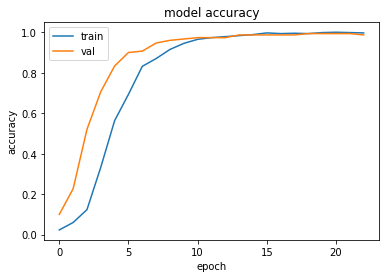

In [49]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

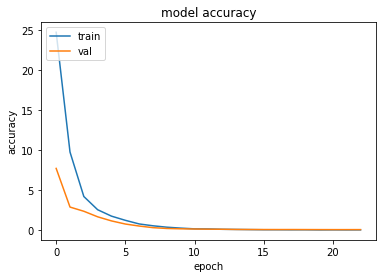

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
model.save('epic_face_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_face_reader.model/assets


In [52]:
new_model = tf.keras.models.load_model('epic_face_reader.model')
predictions = new_model.predict([X_test])
print(predictions)

import numpy as np

print(np.argmax(predictions[1]))

[[6.91325894e-08 2.18626923e-07 4.08204714e-09 ... 1.18994367e-05
  5.84819126e-08 9.99969721e-01]
 [9.42300394e-05 1.19773322e-05 8.14917271e-08 ... 1.11044464e-07
  3.20157460e-06 1.27785257e-04]
 [4.02460110e-09 2.29837406e-06 8.95479459e-08 ... 1.48620760e-08
  4.49505366e-09 3.18266217e-07]
 ...
 [1.12771954e-06 2.45609612e-04 3.03213051e-06 ... 1.62909691e-06
  7.62910986e-06 1.21684287e-04]
 [6.98263307e-07 3.58998705e-07 8.34183709e-07 ... 8.51642596e-08
  2.34010727e-07 7.40776386e-06]
 [1.12369749e-08 3.35159123e-10 3.24303983e-07 ... 4.35646456e-07
  9.46405621e-08 3.74165808e-07]]
32


6


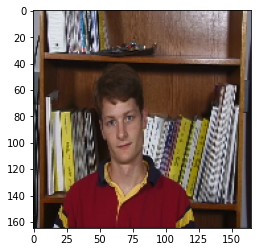

In [53]:
plt.imshow(X_test[40]),print(np.argmax(predictions[40]))
plt.show()

In [54]:
predicted_classes = np.argmax(np.round(predictions),axis=1)

In [55]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))


Found 450 correct labels


In [56]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(50)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.60      1.00      0.75         3
     Class 1       1.00      1.00      1.00         3
     Class 2       1.00      1.00      1.00         3
     Class 3       1.00      1.00      1.00         3
     Class 4       1.00      1.00      1.00         3
     Class 5       1.00      1.00      1.00         3
     Class 6       1.00      1.00      1.00         3
     Class 7       1.00      1.00      1.00         3
     Class 8       1.00      1.00      1.00         3
     Class 9       1.00      1.00      1.00         3
    Class 10       1.00      1.00      1.00         3
    Class 11       1.00      1.00      1.00         3
    Class 12       1.00      1.00      1.00         3
    Class 13       1.00      0.67      0.80         3
    Class 14       1.00      1.00      1.00         3
    Class 15       1.00      1.00      1.00         3
    Class 16       1.00      1.00      1.00         3
    Class 17       1.00    